In [1]:
import os
print(os.name)  # Hasil: 'posix' (Linux/Mac) atau 'nt' (Windows)


nt


In [2]:
current_directory = os.getcwd()
print(current_directory)


D:\python-project


In [3]:
path = './waifus_images/waifus_images_train'
def newPath(path):
    pathDir = os.listdir(path)
    print(pathDir)
    List = []
    for x in pathDir:
        new_path = f"{path}/{x}"
        print(new_path)
        List.append(new_path)
    return List
typePath = newPath(path)

['Dandere', 'Deredere', 'himedere', 'Kundere', 'Tsundere', 'Yandere', 'Yangire']
./waifus_images/waifus_images_train/Dandere
./waifus_images/waifus_images_train/Deredere
./waifus_images/waifus_images_train/himedere
./waifus_images/waifus_images_train/Kundere
./waifus_images/waifus_images_train/Tsundere
./waifus_images/waifus_images_train/Yandere
./waifus_images/waifus_images_train/Yangire


In [4]:
typePath[0]
newtypePath = os.listdir(typePath[0])
os.path.isdir(newtypePath[0])

False

In [5]:
def newPathR(path, List = []):
    path2 = os.listdir(path)
    for i in path2:
        new_path = f"{path}/{i}"
        
        if os.path.isdir(new_path):
            newPathR(new_path,List)
        else:
            List.append(new_path)
           
        # newPath = os.listdir()
        # for x in pathDir:
        #     new_path = f"{path}{x}"
        #     print(new_path)
        #     List.append(new_path)
    return List
    

all_image = newPathR('./waifus_images/waifus_images_train')
len(all_image)

13926

In [6]:
!pip install qdrant_client

In [7]:
from qdrant_client import QdrantClient

client = QdrantClient(url="http://localhost:6333")

In [8]:
!pip install transformers torch

In [15]:
import random
print(all_image[0])
random.shuffle(all_image)
print(all_image[0])

./waifus_images/waifus_images_train/Dandere/Kosaki Onodera100.png
./waifus_images/waifus_images_train/Tsundere/Michiru Kinushima34.png


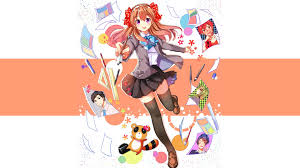

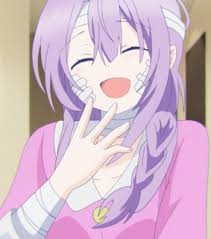

In [16]:
from PIL import Image
img = Image.open(all_image[50])
display(img)
img2 = Image.open(all_image[52])
display(img2)

In [17]:
from transformers import CLIPProcessor, CLIPModel
import torch

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")




In [18]:
def get_image_embedding(image_path):
    image = Image.open(image_path)
    inputs = processor(images=image, return_tensors="pt")
    with torch.no_grad():
        image_embedding = model.get_image_features(**inputs)
    return image_embedding

def get_text_embedding(text):
    inputs = processor(text=text, return_tensors="pt")
    with torch.no_grad():
        text_embedding = model.get_text_features(**inputs)
    return text_embedding

In [65]:
from qdrant_client.models import Distance, VectorParams

# client.create_collection(
#     collection_name="image_collection",
#     vectors_config=models.VectorParams(size=512, distance=models.Distance.COSINE),
# )

True

In [55]:
from qdrant_client import QdrantClient, models
index = 0
new_all_image = all_image[3000:5000]
for i in new_all_image:
    path = f"{i}"
    vector_image = get_image_embedding(path)
    client.upsert(
    collection_name="image_collection",
    points=[
        models.PointStruct(
            id=index,
            payload={
                "path": path,
            },
            vector=vector_image[0],
        ),
    ],
    )
    index = index + 1
    if index%100 == 0:
        print(path)
        print(index)
       

./waifus_images/waifus_images_train/Kundere/Homura Akemi12.png
100
./waifus_images/waifus_images_train/Yandere/Mizuki Himeji171.png
200
./waifus_images/waifus_images_train/himedere/Satsuki Kiryuin138.png
300
./waifus_images/waifus_images_train/Deredere/Hotaru Ichijo75.png
400
./waifus_images/waifus_images_train/Yangire/Akiko Yosano51.png
500
./waifus_images/waifus_images_train/Dandere/Yunyun KonoSuba63.png
600
./waifus_images/waifus_images_train/Kundere/Eucliwood Hellscythe224.png
700
./waifus_images/waifus_images_train/Tsundere/Kaguya Shinomiya89.png
800
./waifus_images/waifus_images_train/Yandere/Misa Amane62.png
900
./waifus_images/waifus_images_train/Dandere/Sekiya Naru43.png
1000
./waifus_images/waifus_images_train/Kundere/Mashiro Shiina32.png
1100
./waifus_images/waifus_images_train/Kundere/Kanade Tachibana128.png
1200
./waifus_images/waifus_images_train/Yandere/Nadeko Sengoku111.png
1300
./waifus_images/waifus_images_train/Yandere/Mizuki Himeji59.png
1400
./waifus_images/waifus_

In [50]:
def search_by_text(path):
    text_embed = get_text_embedding(path)
    new_text_embed = text_embed[0]
    new_text_embed.tolist()
    
    search_result = client.query_points(
        collection_name="image_collection",
        query=text_embed[0].tolist(),
        with_payload=True,
        limit=7
    ).points
    for x in search_result:
        payload = x.payload
        print(payload['path'])
        img = Image.open(payload["path"])
        display(img)
    # img = Image.open(all_image[50])
    # display(img)
    # img2 = Image.open(all_image[52])
    # display(img2)
   

./waifus_images/waifus_images_train/Deredere/Elizabeth Midford27.png


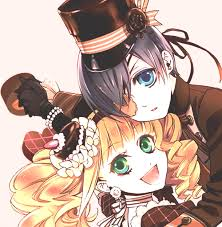

./waifus_images/waifus_images_train/Yandere/Misa Amane106.png


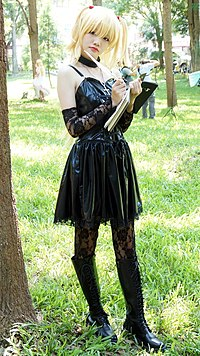

./waifus_images/waifus_images_train/Kundere/Enma Ai111.png


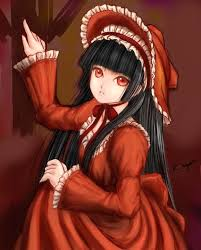

./waifus_images/waifus_images_train/Deredere/Elizabeth Midford22.png


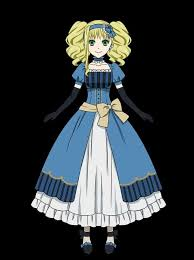

./waifus_images/waifus_images_train/Deredere/Elizabeth Midford65.png


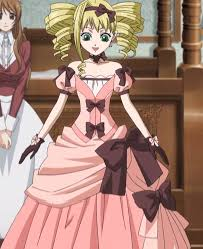

./waifus_images/waifus_images_train/Yangire/Euphemia li Britannia70.png


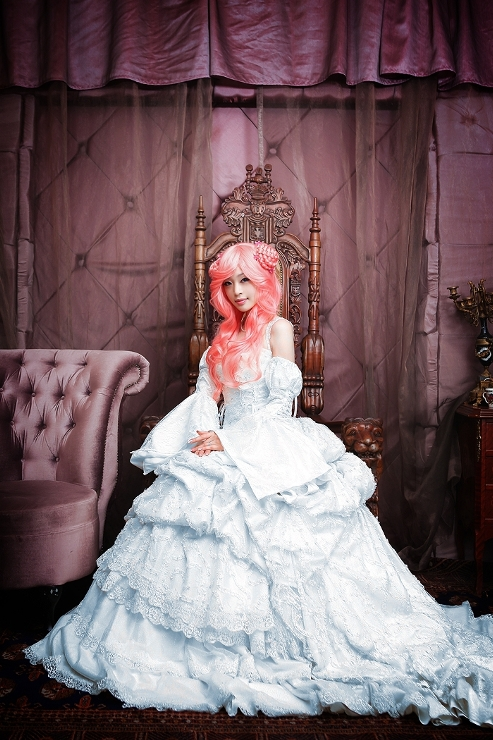

./waifus_images/waifus_images_train/Yandere/Touko Fukawa3.png


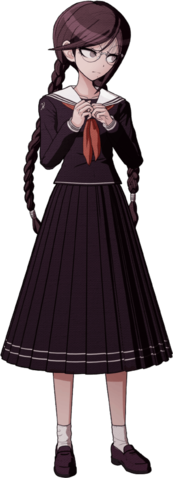

In [68]:
search_by_text('victorian age')